In [1]:
import os
from pathlib import Path

import torch
import torchaudio
import soundfile as sf
import sounddevice as sd
from scipy.io import wavfile


In [2]:
datapath = Path('/Users/erkan.bayram/data/ull_anc/ver1')


load_path = Path('/train-clean-360/22/121140.FLAC')

src_audio_path = Path('/Users/erkan.bayram/data/ull_anc/ver1/train-clean-360/22/121140/22-121140-0004.FLAC')

In [3]:
data, samplerate = sf.read(src_audio_path)  

In [4]:
sd.play( data , samplerate)


In [6]:
samplerate_wind, data_wind = wavfile.read('./wind_noise_11.wav')


In [7]:
sd.play( data_wind , samplerate_wind)

In [8]:
data_wind

array([  18,   30,  -17, ..., 1540, 1506, 1571], dtype=int16)

In [10]:
data_dum = data_wind[0:len(data)]

In [11]:
import matplotlib.pyplot as plt
import numpy as np


In [12]:
np.max( data_dum )

28137

In [13]:
data_dum = (data_dum) / (np.max(data_dum))  

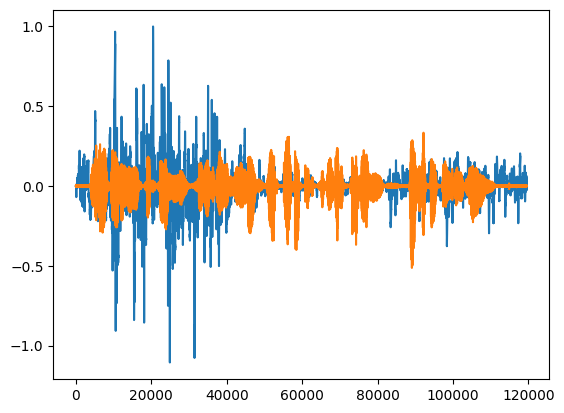

In [14]:
plt.plot( data_dum  )
plt.plot( data )

In [15]:
data_dum + data

array([ 0.00295906,  0.00344658, -0.00032953, ...,  0.0562373 ,
        0.05604453,  0.05742597])

In [16]:
sd.play( data_dum + data , samplerate )



In [17]:
sd.play( data_dum  , samplerate )


In [18]:
sd.play(  data , samplerate )

In [17]:
sd.play(  data_wind , samplerate )